In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('AD-Tech.csv')
df = df1.sample(n=50000,random_state=10).reset_index(drop=True)

In [3]:
df.nunique()

date                         30
site_id                      10
ad_type_id                    2
geo_id                      203
device_category_id            5
advertiser_id                23
order_id                     71
line_item_type_id             7
os_id                         7
integration_type_id           1
monetization_channel_id       5
ad_unit_id                  131
total_impressions           721
total_revenue              2360
viewable_impressions        437
measurable_impressions      696
revenue_share_percent         1
dtype: int64

In [4]:
df['total_revenue'].sum()

3275.0192000000006

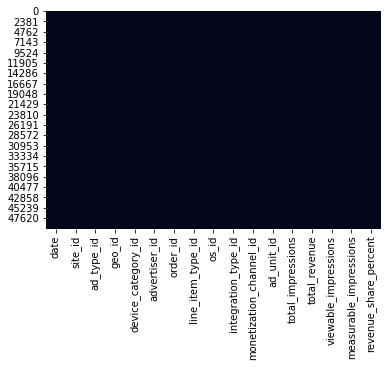

In [5]:
sns.heatmap(df.isnull(),cbar=False,cbar_kws={'color':'r'})
plt.show()

In [6]:
df.columns

Index(['date', 'site_id', 'ad_type_id', 'geo_id', 'device_category_id',
       'advertiser_id', 'order_id', 'line_item_type_id', 'os_id',
       'integration_type_id', 'monetization_channel_id', 'ad_unit_id',
       'total_impressions', 'total_revenue', 'viewable_impressions',
       'measurable_impressions', 'revenue_share_percent'],
      dtype='object')

In [7]:
cat_col=['date','geo_id','order_id','site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']
scat_col = ['site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']

for i in cat_col:
    df[i]=df[i].astype('object')

In [8]:
scat_col = ['site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']

In [9]:
# for i in scat_col:
#     sns.barplot(x=df['total_revenue'],y=df[i])

## Univariate Analysis

site_id


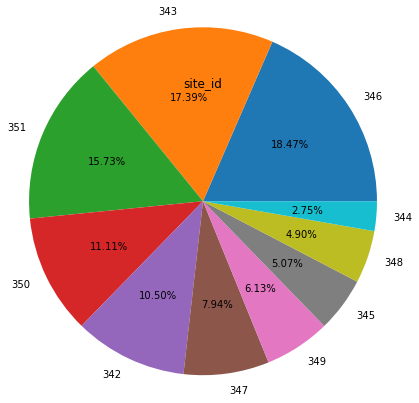

ad_type_id


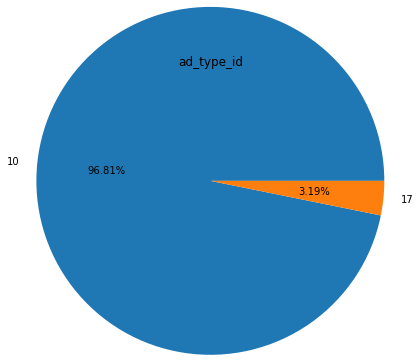

device_category_id


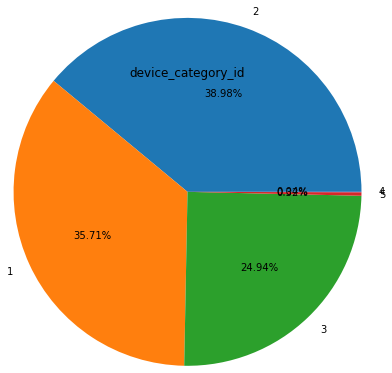

advertiser_id


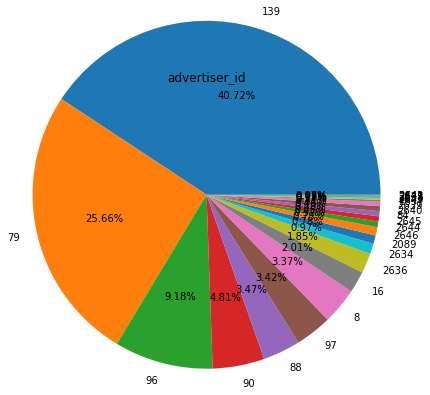

line_item_type_id


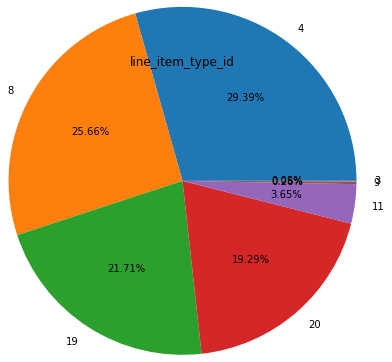

os_id


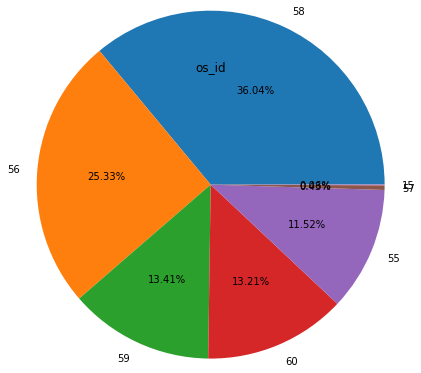

monetization_channel_id


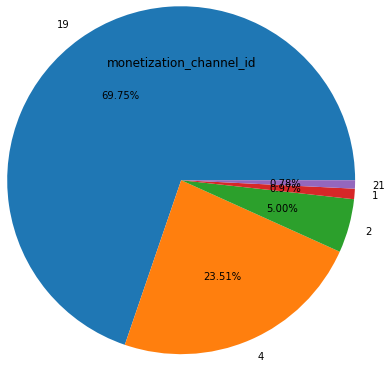

In [10]:
for i in scat_col:
        print(i)
        plt.pie(df[i].value_counts(),autopct='%1.2f%%',labels=df[i].unique(),radius=2)
        plt.title(i,)
        plt.show()

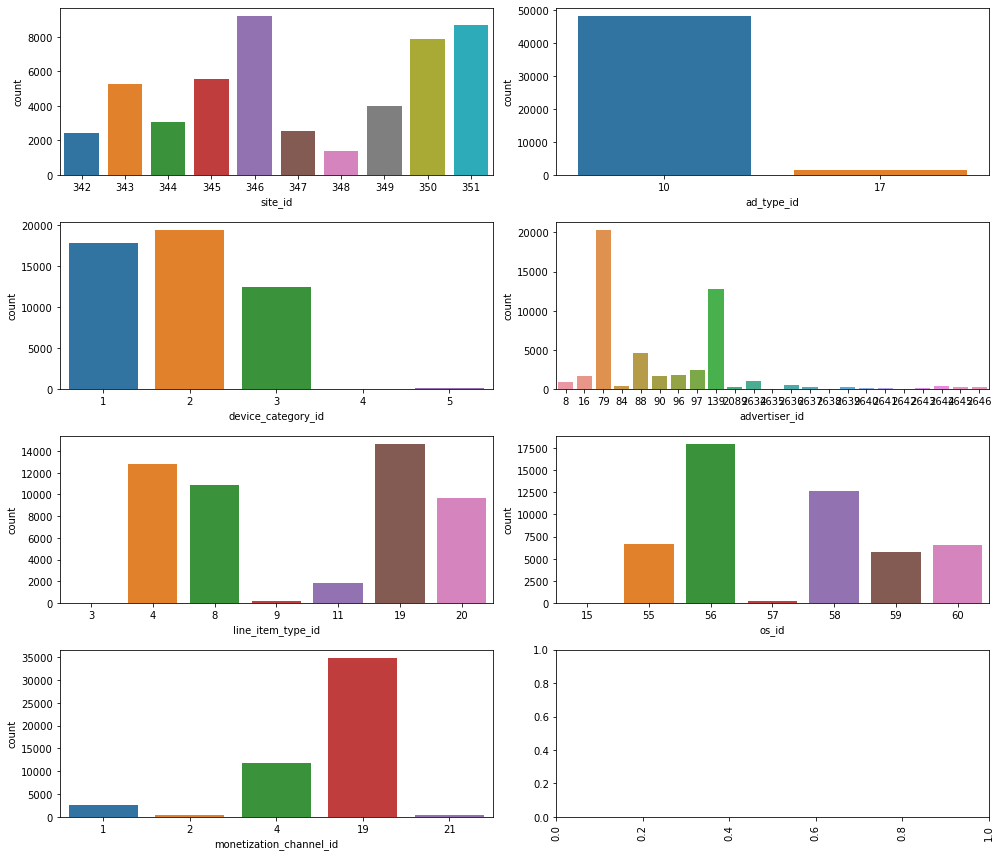

In [11]:
fig, ax = plt.subplots(4,2, figsize=(14,12))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i,col in enumerate(scat_col):
    sns.countplot(data=df,x=col,ax=axes_[i])
    if col=='advertiser_id':
        plt.xticks(rotation=90)
    plt.tight_layout()

In [12]:
df.drop(['ad_unit_id','revenue_share_percent','integration_type_id'],axis=1,inplace=True)

In [13]:
num_col=list(df.select_dtypes(np.number).columns)

In [14]:
num_col

['total_impressions',
 'total_revenue',
 'viewable_impressions',
 'measurable_impressions']

total_impressions


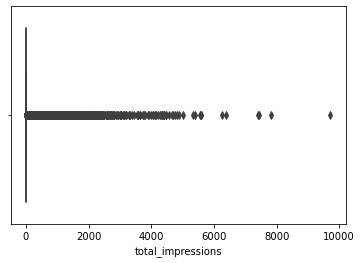

total_revenue


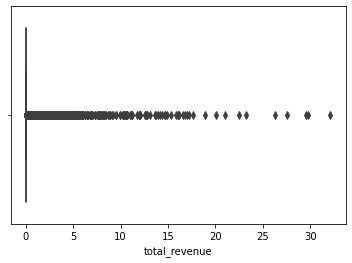

viewable_impressions


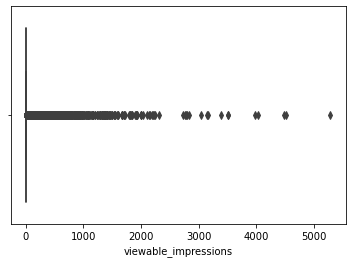

measurable_impressions


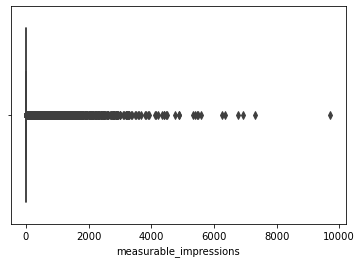

In [15]:
for i in num_col:
    print(i)
    sns.boxplot(x=df[i],)
    plt.show()

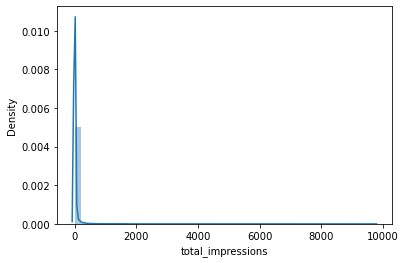

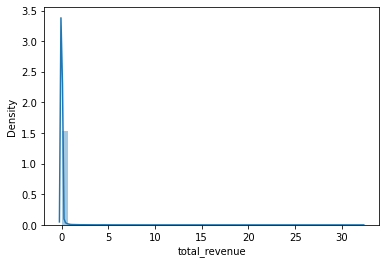

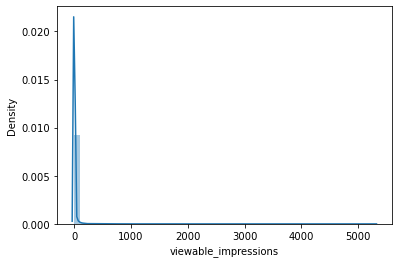

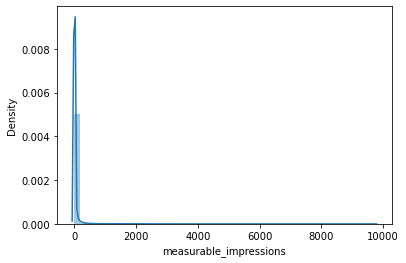

In [16]:
for i in num_col:
    sns.distplot(a=df[i])
    plt.show()

## Bivariate

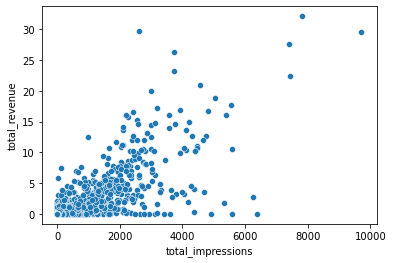

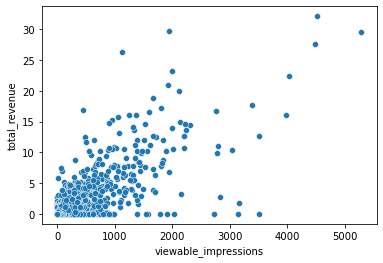

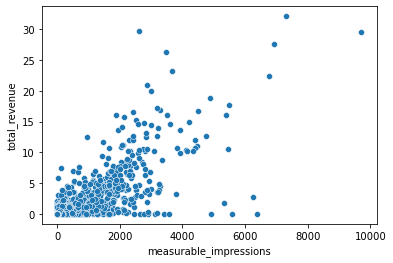

In [17]:
for i in num_col:
    if i!='total_revenue':
        sns.scatterplot(data=df,x=i,y='total_revenue')
        plt.show()

In [18]:
df.shape

(50000, 14)

Relationship of site_id with total_revenue
Relationship of ad_type_id with total_revenue
Relationship of device_category_id with total_revenue
Relationship of advertiser_id with total_revenue
Relationship of line_item_type_id with total_revenue
Relationship of os_id with total_revenue
Relationship of monetization_channel_id with total_revenue


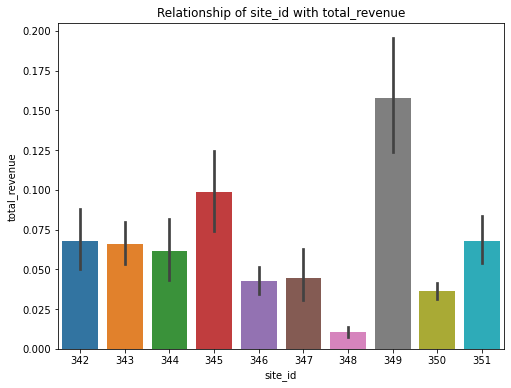

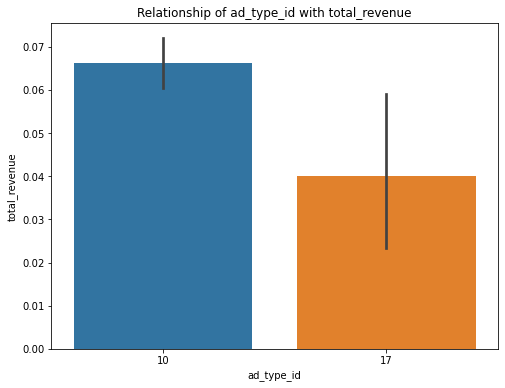

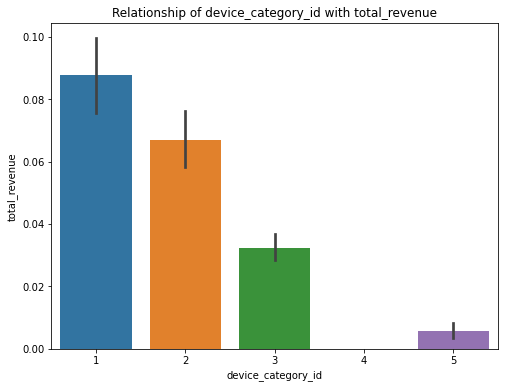

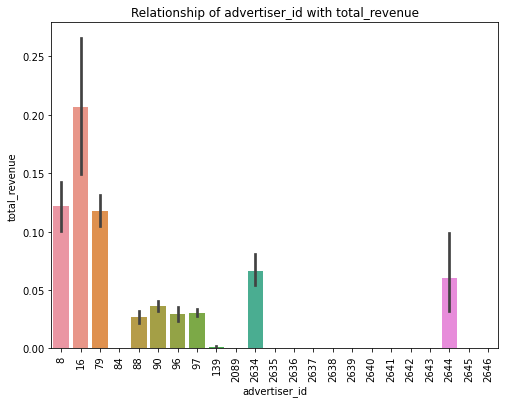

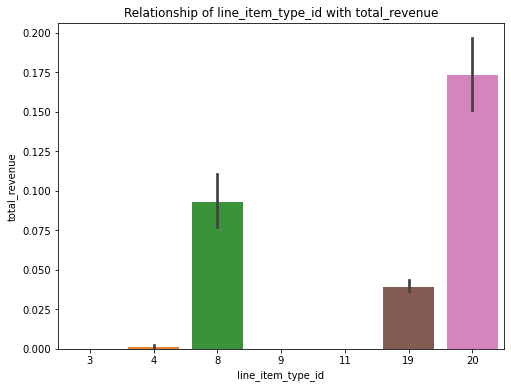

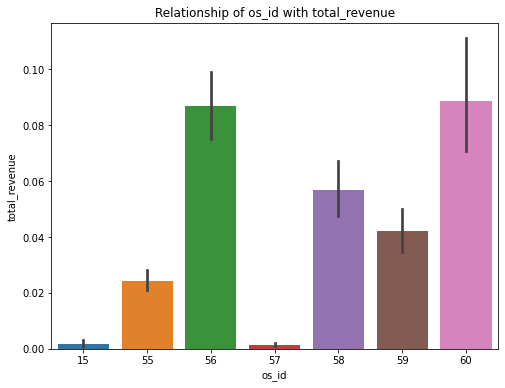

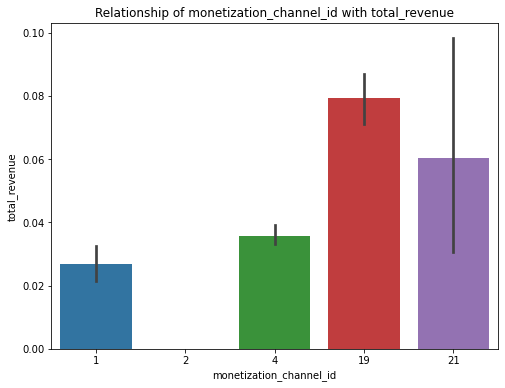

In [19]:
for col in (scat_col):
    print('Relationship of',col,'with total_revenue')

for col in (scat_col):
    title='Relationship of '+col+' with total_revenue'
    plt.figure(figsize=(8,6))
    sns.barplot(y=df['total_revenue'],x=df[col])
    if col=='advertiser_id':
        plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

Relationship of site_id with total_impressions
Relationship of ad_type_id with total_impressions
Relationship of device_category_id with total_impressions
Relationship of advertiser_id with total_impressions
Relationship of line_item_type_id with total_impressions
Relationship of os_id with total_impressions
Relationship of monetization_channel_id with total_impressions


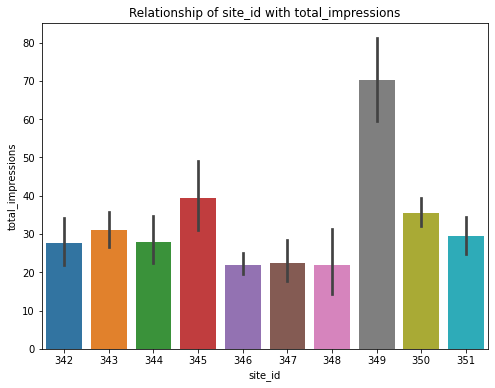

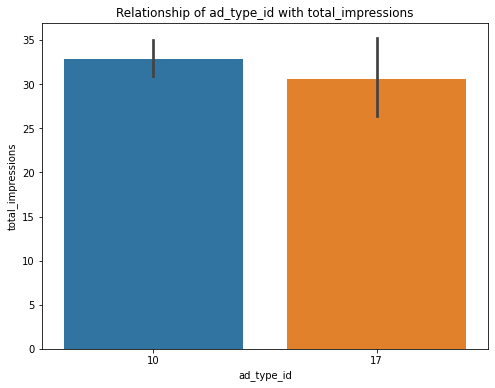

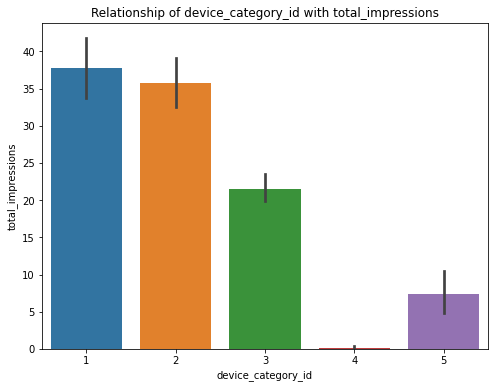

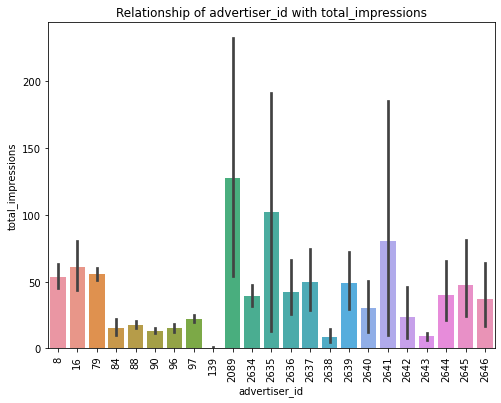

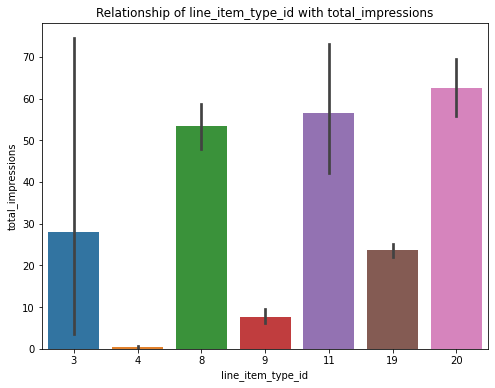

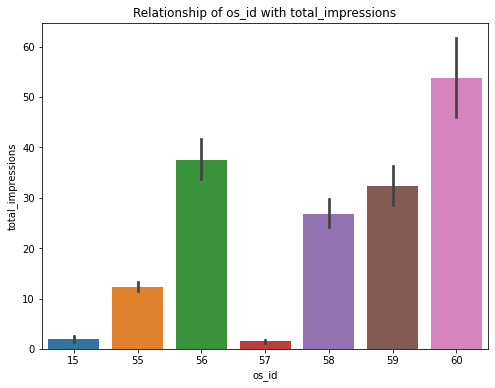

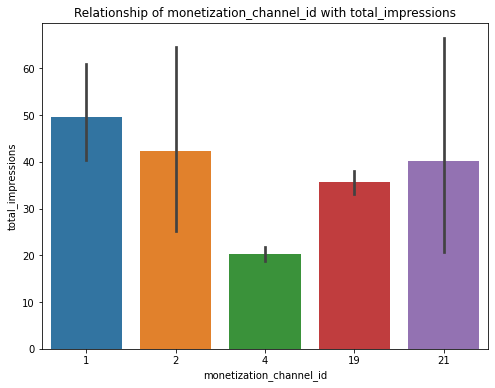

In [20]:
for col in (scat_col):
    print('Relationship of',col,'with total_impressions')

for col in (scat_col):
    title='Relationship of '+ col +' with total_impressions'
    plt.figure(figsize=(8,6))
    sns.barplot(y=df['total_impressions'],x=df[col],)
    if col=='advertiser_id':
        plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

In [21]:
df.select_dtypes(np.number)

,total_impressions,total_revenue,viewable_impressions,measurable_impressions
0,0,0.0000,0,0
1,2,0.0000,0,2
2,6,0.0064,2,6
3,6,0.0000,0,6
4,0,0.0000,0,0
...,...,...,...,...
49995,0,0.0000,0,0
49996,0,0.0000,0,0
49997,12,0.0000,8,8
49998,0,0.0000,0,0


In [22]:
df=df[(df['device_category_id']!=5) & (df['monetization_channel_id']!=4)]
df=df[(df['line_item_type_id']!=9) & (df['line_item_type_id']!=3)]
df=df[(df['os_id']!=57) & (df['os_id']!=15)]
df=df[(df['monetization_channel_id']!=21) & (df['monetization_channel_id']!=21)]

In [23]:
df.drop(['site_id','advertiser_id'],axis=1,inplace=True)

In [24]:
df.drop(['date','geo_id','order_id'],axis=1,inplace=True)

In [25]:
df=pd.get_dummies(df,drop_first=True)

In [26]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [27]:
dfs=ss.fit_transform(df)

In [28]:
dfsp = pd.DataFrame(dfs,columns=df.columns)

In [29]:
from sklearn.decomposition import PCA
pca= PCA()

In [30]:
Xs=df.drop('total_revenue',axis=1)

In [31]:
pca.fit(Xs)

PCA()

In [32]:
np.cumsum(pca.explained_variance_ratio_)

array([0.97973189, 0.99803606, 0.99998706, 0.99999094, 0.99999351,
       0.99999556, 0.99999693, 0.99999816, 0.99999883, 0.99999936,
       0.99999976, 0.99999993, 0.99999999, 1.        , 1.        ,
       1.        , 1.        ])

In [33]:
pca=PCA(n_components=1)
df_pca = pca.fit_transform(Xs)
df_pca = pd.DataFrame(df_pca,columns=['pc1'])
df_pca.head()

,pc1
0,-53.241289
1,-50.549582
2,-45.166367
3,-53.241158
4,-53.241235


In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [35]:
from sklearn.model_selection import train_test_split
y = dfsp['total_revenue']
X_train,X_test,y_train,y_test = train_test_split(df_pca,y, test_size=0.2,random_state=4)

In [36]:
from sklearn.metrics import r2_score,mean_squared_error

In [37]:
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)

print('r2 Train',r2_score(y_train,y_train_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

y_test_pred=lr.predict(X_test)

print('\n\nTest')
print('\n\r2 Test',r2_score(y_test,y_test_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 Train 0.6610300748985218
RMSE Train: 0.5881684019448915


Test

2 Test 0.624700547565588
RMSE Train: 0.5868765908130315


In [38]:
df[['total_impressions','total_revenue','viewable_impressions','measurable_impressions']].corr()

,total_impressions,total_revenue,viewable_impressions,measurable_impressions
total_impressions,1.000000,0.799720,0.895332,0.994846
total_revenue,0.799720,1.000000,0.798883,0.802787
viewable_impressions,0.895332,0.798883,1.000000,0.910834
measurable_impressions,0.994846,0.802787,0.910834,1.000000


In [39]:
df1=df.copy()

In [40]:
df1.drop('total_impressions',axis=1,inplace=True)

In [41]:
df1[['total_revenue','viewable_impressions','measurable_impressions']].corr()

,total_revenue,viewable_impressions,measurable_impressions
total_revenue,1.000000,0.798883,0.802787
viewable_impressions,0.798883,1.000000,0.910834
measurable_impressions,0.802787,0.910834,1.000000


In [42]:
df1['total_revenue'].max()

32.1132

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rfr = RandomForestRegressor()

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [ ]:
rfr = RandomForestRegressor()

param_dist = {'n_estimators':sp_randint(25,250),
              'max_features':sp_randint(1,24),
              'max_depth':sp_randint(2,15),
              'min_samples_leaf':sp_randint(1,50)}

rsearch = RandomizedSearchCV(rfr,param_distributions=param_dist,scoring='r2',
                           n_iter=100,cv=3,n_jobs=-1,random_state=4)
rsearch.fit(df_pca,y)

In [46]:
lr.fit(df_pca,y)

LinearRegression()

In [48]:
rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train,y_train)
y_train_pred=rfr.predict(X_train)

print('r2 Train',r2_score(y_train,y_train_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

y_test_pred=rfr.predict(X_test)

print('\n\nTest')
print('\nr2 Test',r2_score(y_test,y_test_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 Train 0.9361362177365959
RMSE Train: 0.25529859420125883


Test

r2 Test 0.38013943019138907
RMSE Train: 0.7542317788038144


,total_impressions,total_revenue,viewable_impressions,measurable_impressions,ad_type_id_17,device_category_id_2,device_category_id_3,device_category_id_4,line_item_type_id_8,line_item_type_id_11,line_item_type_id_19,line_item_type_id_20,os_id_56,os_id_58,os_id_59,os_id_60,monetization_channel_id_2,monetization_channel_id_19
0,0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,2,0.0,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,6,0.0,0,6,0,1,0,0,1,0,0,0,0,0,0,1,0,1
4,0,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
5,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0.0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
49996,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
49997,12,0.0,8,8,0,0,0,0,1,0,0,0,1,0,0,0,0,1
49998,0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

pca = PCA(n_components=12)
pca.fit(X_trains) # or instead of fitting and transforming run fit_transform on trans and just transform on tests
X_trains_pca = pca.transform(X_trains) # to get the same result
X_tests_pca = pca.transform(X_tests)